### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Read the dataset

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/Data_Science/Mini project Oct-23 Batch/insurance.csv')

###  Data Exploration

In [3]:
df.head()  #First five rows of dataset

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.tail()  #last five rows of dataset

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


### The Datset consists of 8 features & 1338 samples.

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


###  Checking for missing values

In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

### Data set does not contain any missing values. 

### Distribution plots

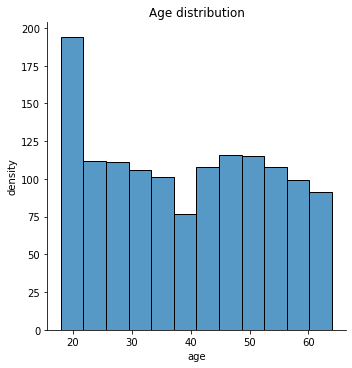

In [8]:
sns.displot(df['age'])
plt.title('Age distribution')
plt.ylabel('density')
plt.xlabel('age')
plt.show()

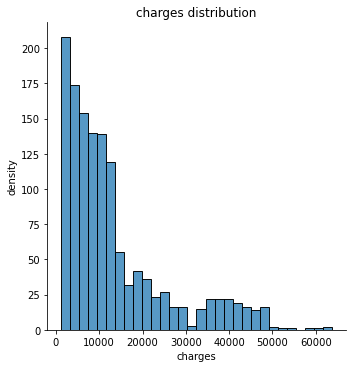

In [9]:
sns.displot(df['charges'])
plt.title('charges distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

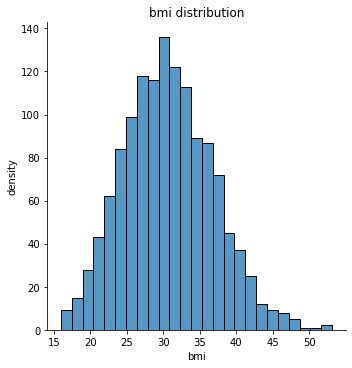

In [10]:
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.ylabel('density')
plt.xlabel('bmi')
plt.show()

In [11]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

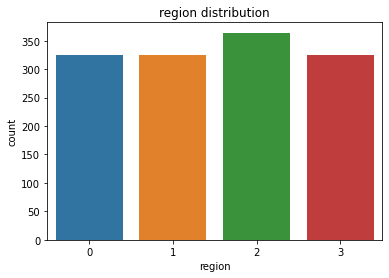

In [12]:
sns.countplot(x = 'region', data = df)
plt.title('region distribution')
plt.show()

In [13]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

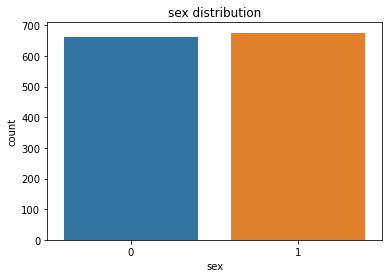

In [14]:
sns.countplot(x = 'sex', data = df)
plt.title('sex distribution')
plt.show()

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

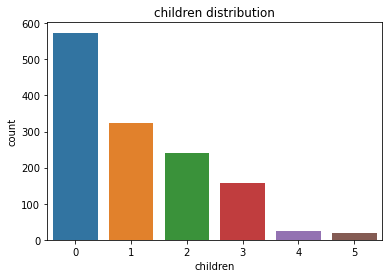

In [16]:
sns.countplot(x = 'children', data = df)
plt.title('children distribution')
plt.show()

### Correlation checking

In [17]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges           1.000000
insuranceclaim    0.309418
age               0.299008
bmi               0.198341
children          0.067998
sex               0.057292
region            0.006208
smoker           -0.787251
Name: charges, dtype: float64

### Correlation Plot

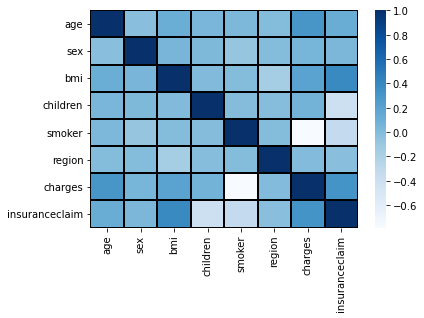

In [18]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Blues', linecolor='black', linewidths= 2 )
plt.show()

### Pair plot 

<Figure size 432x288 with 0 Axes>

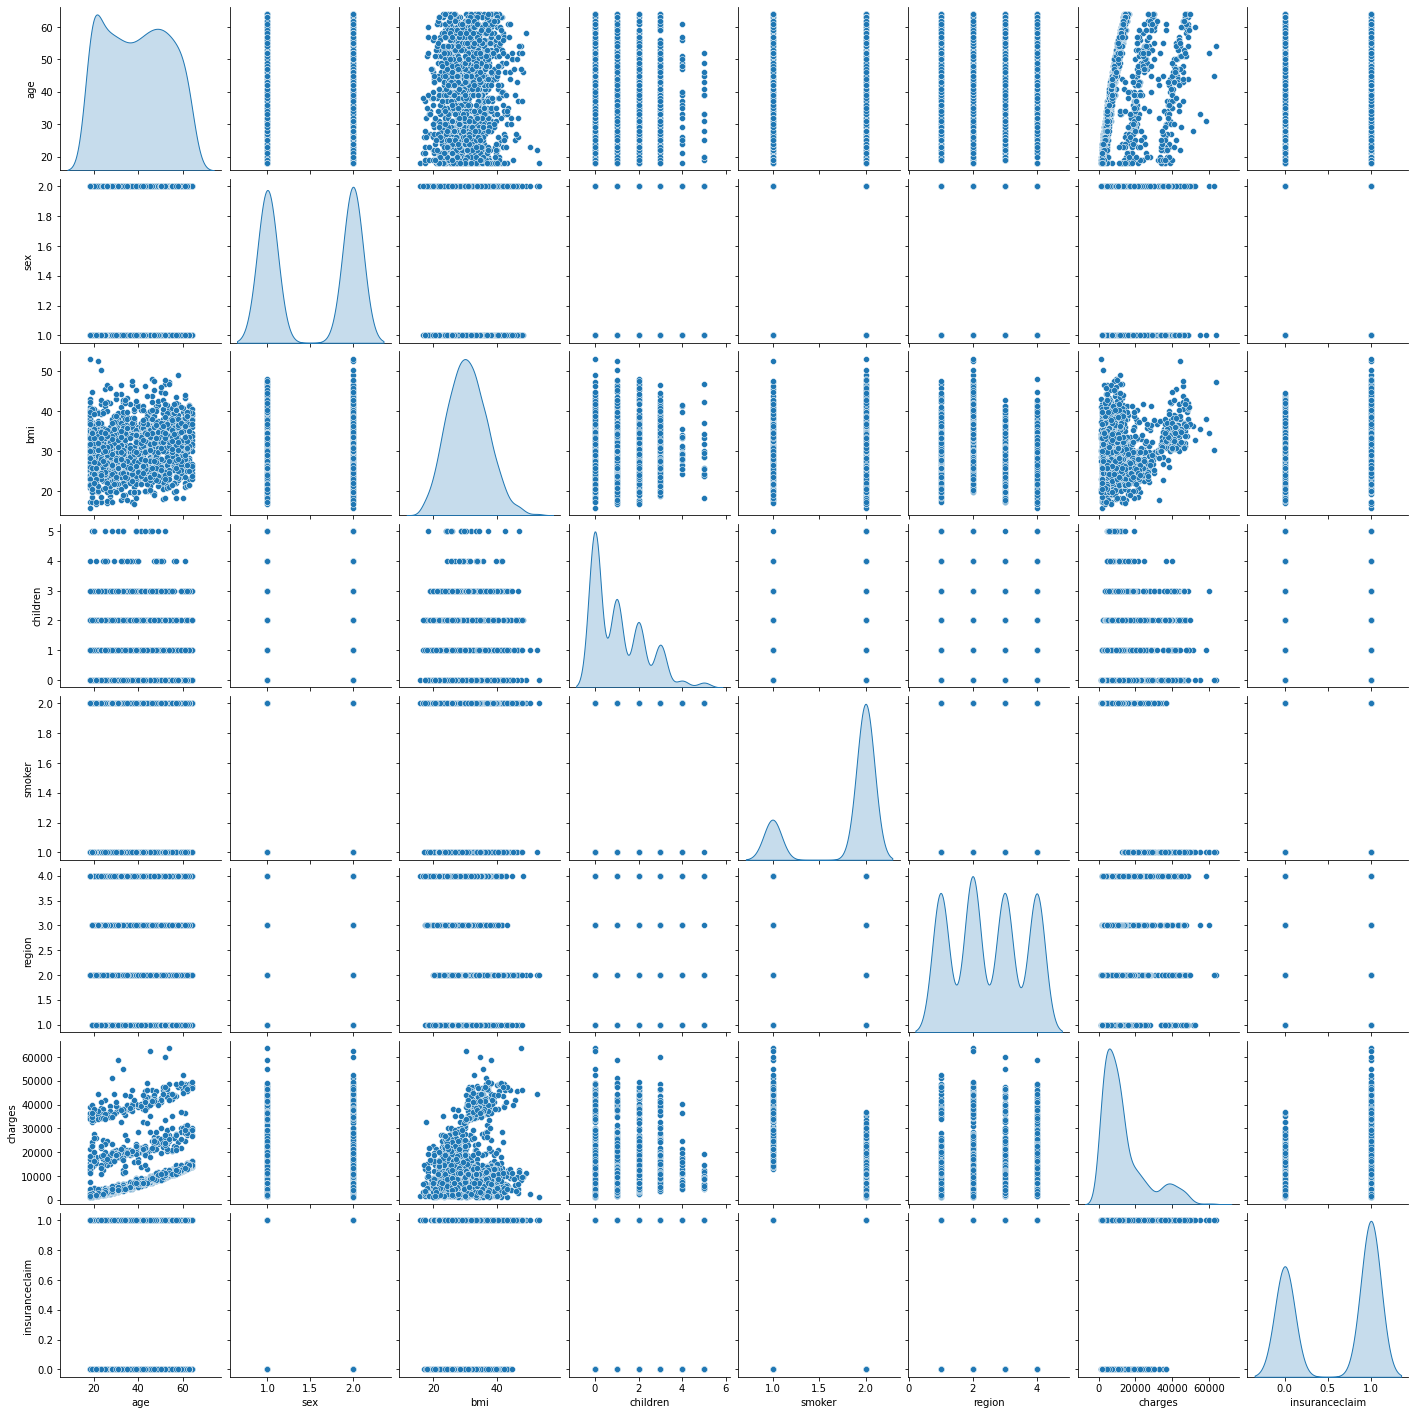

In [19]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

###  
Target variable : insurance claim

Yes:1

No:0

### We will predict the insurance claim by building machine learning algorithm using various methods.

### 1)Logistic regression

In [21]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [22]:
X = df.drop('insuranceclaim', axis = 1)
y = df['insuranceclaim']

### Train test split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (936, 7)
X_test :  (402, 7)
y_train :  (936,)
y_test :  (402,)


### Scaling

In [25]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [26]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

### Accuracy on training dataset

In [28]:
accuracy = lr.score(X_train_scaled,y_train)
accuracy

0.8856837606837606

### Accuracy on test dataset

In [29]:
accuracy = lr.score(X_test_scaled,y_test)
accuracy

0.8656716417910447

### Accuracy on training dataset by logistic regression is 88%
### Accuracy on test dataset by logistic regression is 85%

### 2. Random Forest 

In [30]:
rf=RandomForestRegressor(n_estimators=1000,random_state=42)

#fit model 

rf.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [31]:
y_pred=rf.predict(X_test_scaled)
y_pred

array([0.203, 1.   , 0.189, 1.   , 0.001, 0.   , 0.999, 0.   , 0.775,
       0.023, 0.16 , 1.   , 0.941, 0.998, 0.997, 0.999, 0.141, 0.   ,
       1.   , 1.   , 1.   , 0.107, 0.994, 0.033, 0.   , 1.   , 0.02 ,
       1.   , 1.   , 0.019, 0.781, 0.018, 1.   , 0.031, 1.   , 0.116,
       0.   , 0.149, 0.745, 0.029, 0.337, 0.137, 0.008, 0.066, 1.   ,
       1.   , 0.002, 1.   , 0.97 , 0.   , 0.857, 1.   , 0.001, 0.003,
       0.912, 1.   , 1.   , 0.958, 1.   , 0.011, 0.   , 0.706, 0.998,
       0.998, 0.001, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 0.001, 0.999, 0.027, 1.   , 0.007, 0.023, 1.   ,
       0.997, 1.   , 0.   , 0.   , 1.   , 0.03 , 0.942, 0.103, 1.   ,
       0.912, 0.   , 0.   , 0.234, 1.   , 1.   , 0.01 , 1.   , 0.002,
       1.   , 0.957, 0.982, 0.984, 0.958, 0.982, 1.   , 0.751, 0.121,
       0.985, 1.   , 0.036, 0.049, 0.795, 0.934, 0.977, 0.   , 0.985,
       0.974, 0.012, 0.082, 0.02 , 1.   , 0.619, 0.859, 1.   , 1.   ,
       0.   , 0.854,

### Accuracy on training dataset

In [32]:
accuracyTR = rf.score(X_train_scaled,y_train)
accuracyTR

0.9919219750074131

### Accuracy on test dataset

In [33]:
accuracyTE = rf.score(X_test_scaled,y_test)
accuracyTE

0.9351411776556776

### Accuracy on training dataset by Random Forest is 99%
### Accuracy on test dataset byRandom Forest is 94%